In [2]:
# data => banknotes.csv

In [6]:
import pandas as pd
import numpy as nnp
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('banknotes.csv')
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


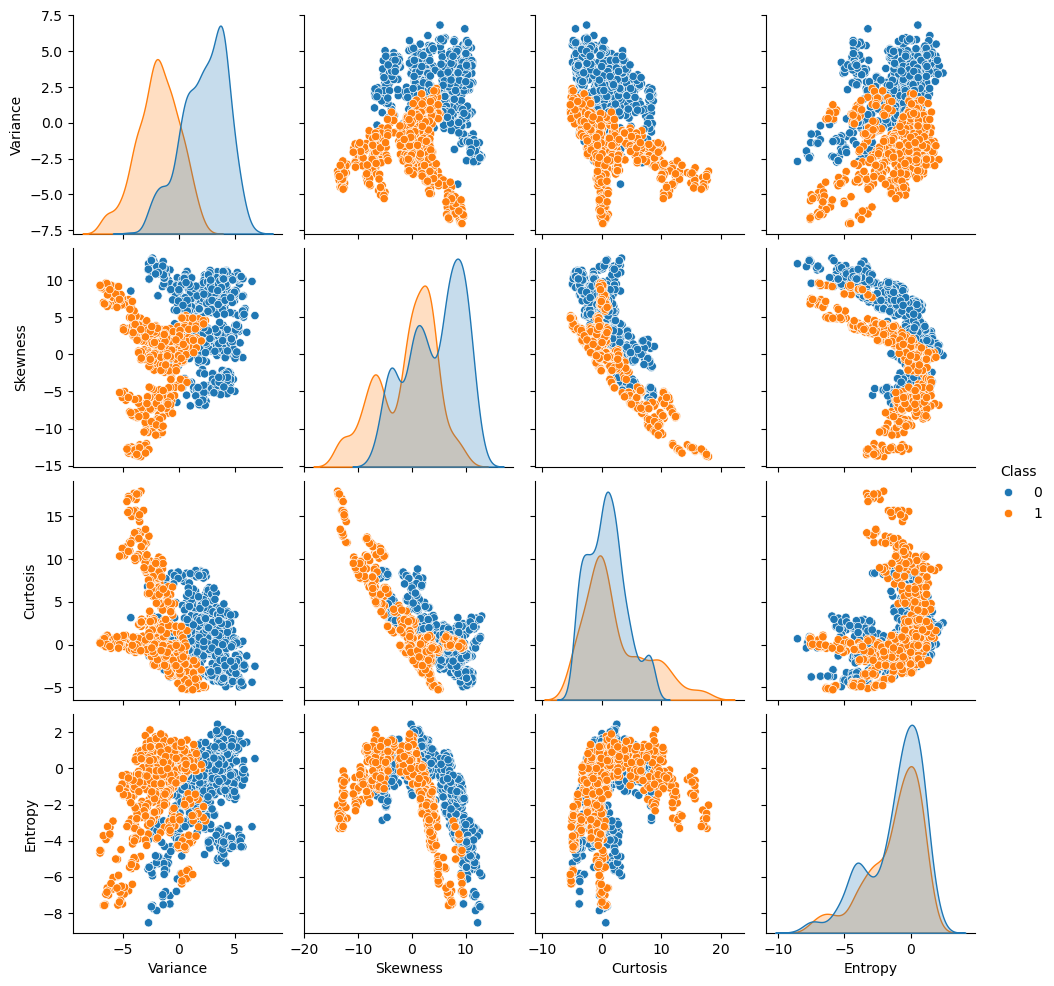

In [12]:
sns.pairplot(df, hue = 'Class');

In [14]:
x = df.drop('Class', axis = 1)
y = df['Class']

In [18]:
x;

In [20]:
# cross validation

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   random_state= 0,
                                                   test_size= 0.2)

In [22]:
x_train.shape, y_train.shape

((1097, 4), (1097,))

In [24]:
# build the model

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt = DecisionTreeClassifier(random_state= 0)

In [30]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [32]:
# predict on test data
y_pred = dt.predict(x_test)

In [36]:
y_pred;

In [40]:
y_test;

#### Evaluate

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

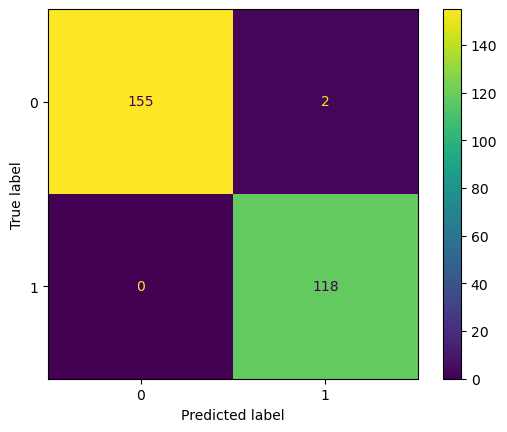

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       157
           1       0.98      1.00      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9927272727272727

In [51]:
y_test.shape

(275,)

In [53]:
from sklearn.tree import plot_tree

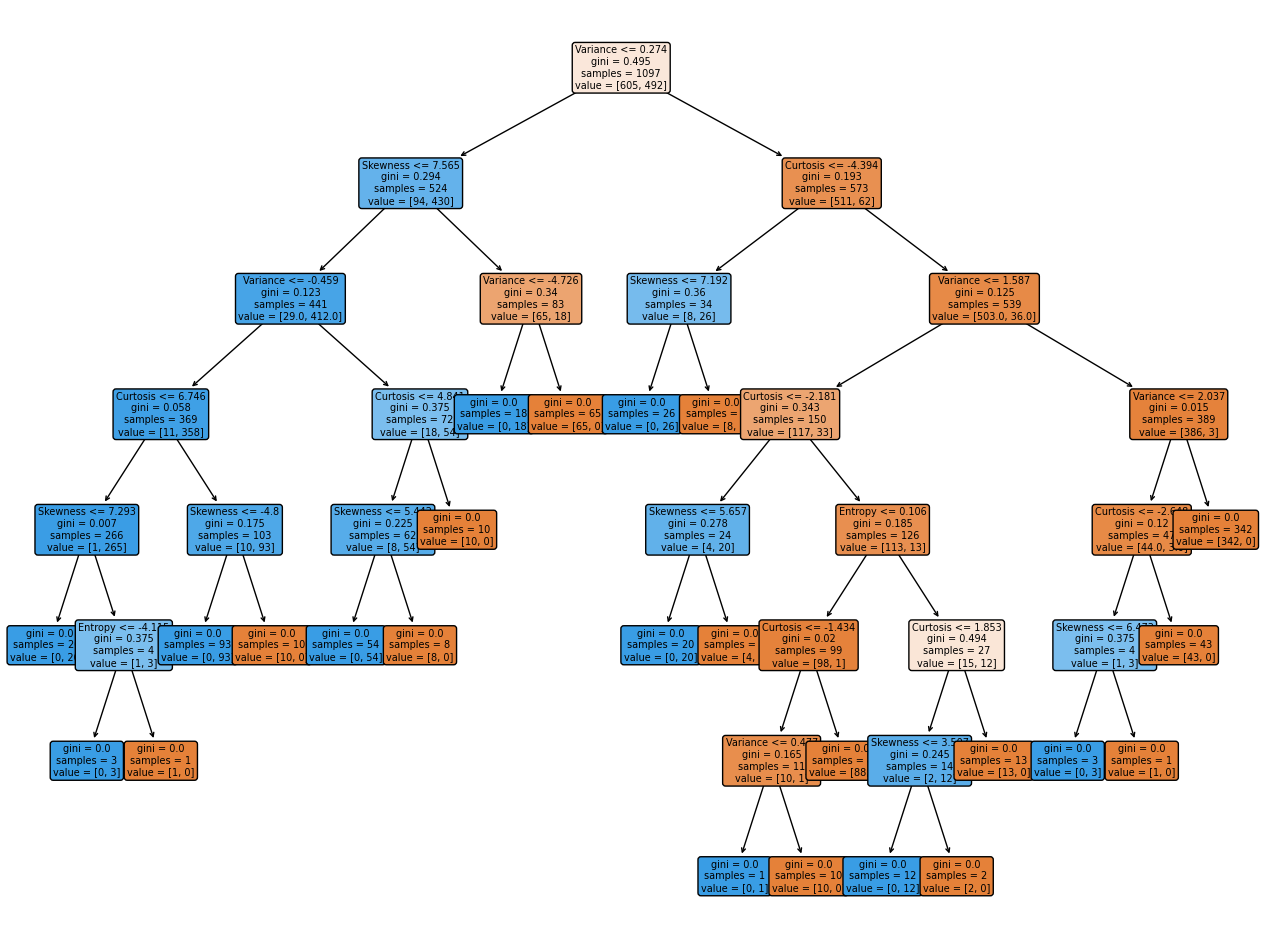

In [57]:
plt.figure(figsize=(16,12))
plot_tree(dt, rounded= True, fontsize= 7, filled = True,
         feature_names= x.columns);

In [59]:
dt.feature_importances_

array([0.59661145, 0.23625864, 0.14961622, 0.01751369])

<BarContainer object of 4 artists>

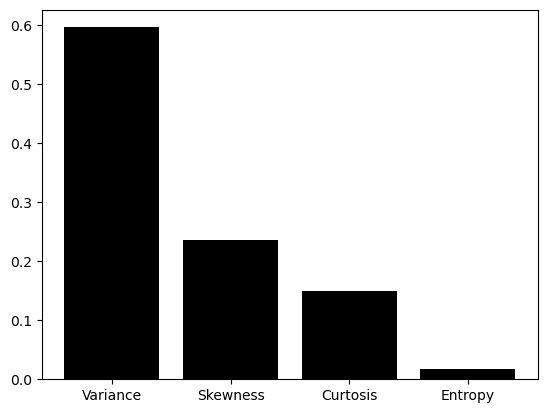

In [61]:
plt.bar(x.columns, dt.feature_importances_, color = 'black')